Loading Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.graph_objects as go

1. Data Preparation

In [70]:
def wrangle(path):
    # Importing Dataset
    df = pd.read_csv(path)
    return df

In [71]:
url = "https://drive.google.com/file/d/1Z1_SGS7OVqyrgW_kSmufJkD4w0xsV0C2/view?usp=drive_link"

# Converting my dataset to a downloadable link .
file_id = url.split("/d/")[1].split("/")[0]
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"



In [72]:
 #this is reading my data set
df = pd.read_csv(download_url)

In [73]:

print("The shape of the Dataframe is", df.shape)
df.info()
df['diagnosis'].value_counts()

The shape of the Dataframe is (569, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null   

,count
diagnosis,
B,357
M,212


2. Exploratory Data Analysis

Bar Chart Showing the Dependent varible (Diagnosis)

In [74]:
def horizontal_chart_diagnosis():
    # Calculate value counts
    island_counts = df["diagnosis"].value_counts(normalize = True)*100

    # Create a horizontal bar chart using Plotly
    fig = go.Figure(
        go.Bar(
            y=island_counts.index,
            x=island_counts.values,
            orientation='h',
            marker_color='blue')
        )
    fig.update_layout(
        title='Horizontal Bar Chart for Cancer Diagnosis',
        xaxis_title='Frequency',
        yaxis_title='Cancer Diagnosis'
    )

    return fig

horizontal_chart_diagnosis().show()

In [75]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Correlation

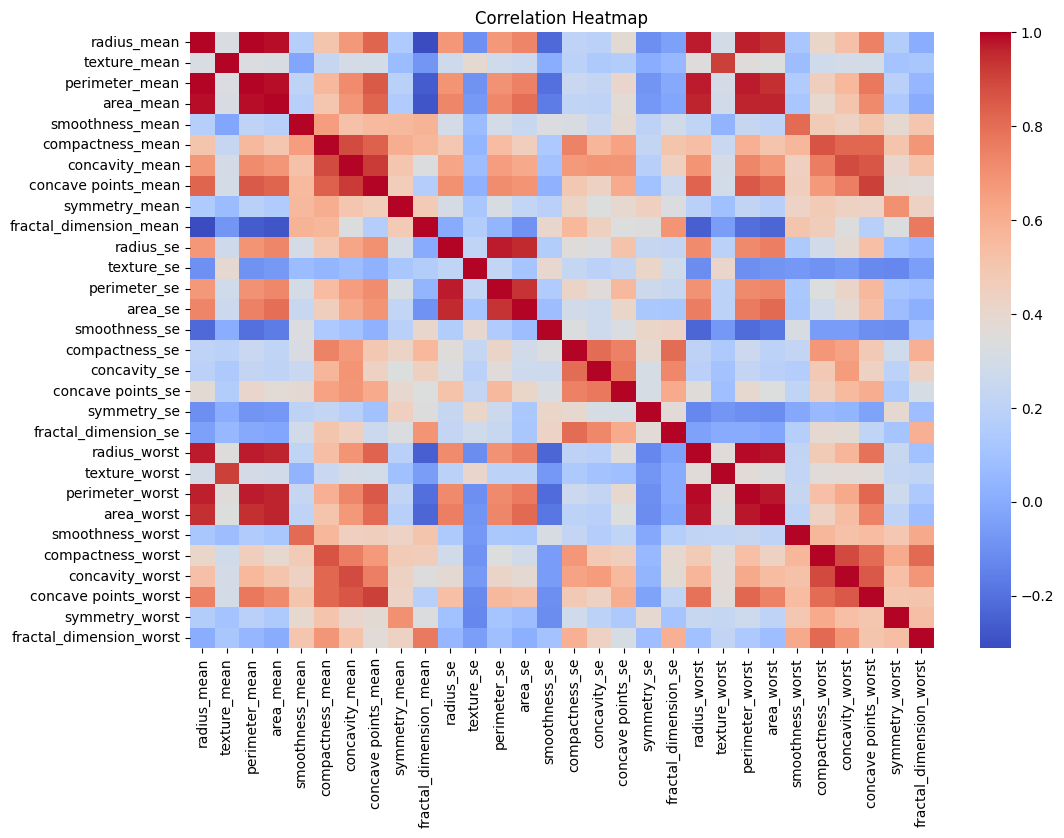

In [76]:
numeric_cols = df.select_dtypes(include='number').columns
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

Trimming correlated variables

In [77]:
# Remove one of each pair of features with correlation > 0.85
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
df_reduced = df.drop(columns=high_corr)
print(f"Removed {len(high_corr)} highly correlated features:", high_corr)

Removed 13 highly correlated features: ['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']


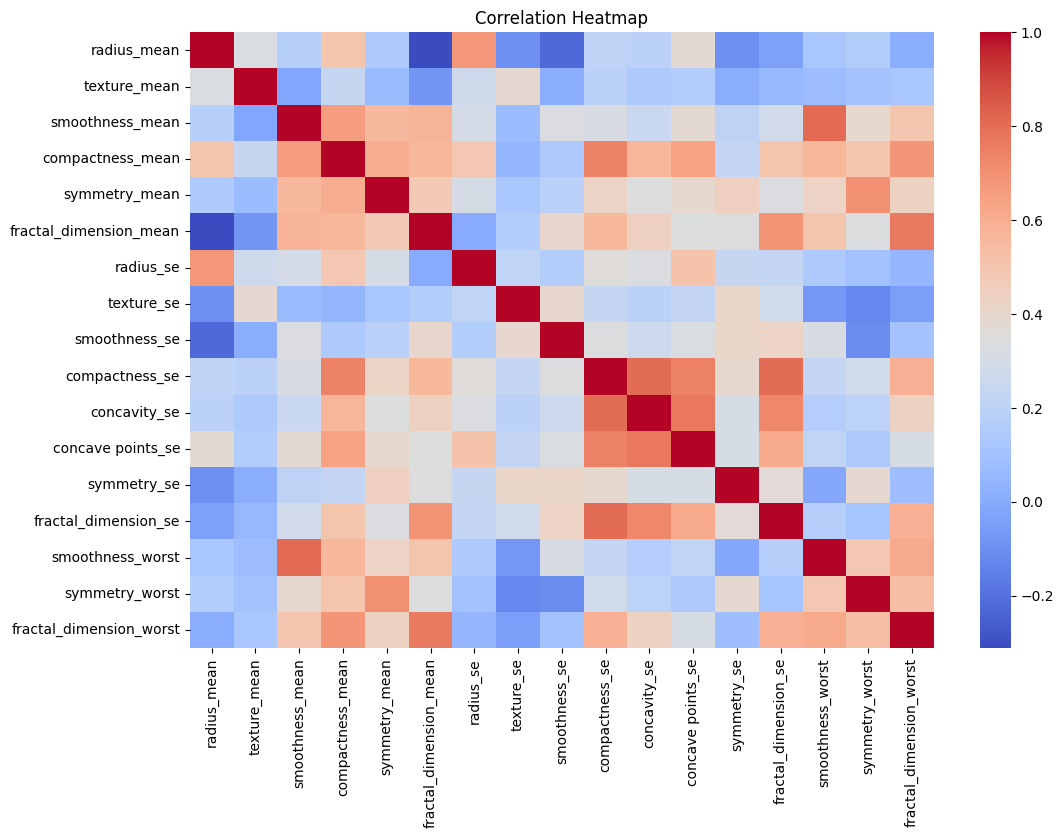

In [78]:
corr_matrix = df_reduced.select_dtypes(include='number').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

Check Multicollinearity using VIF

In [79]:
X_vif = df_reduced.drop('diagnosis', axis=1)
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data)

                    Feature         VIF
0               radius_mean   42.651553
1              texture_mean   34.672606
2           smoothness_mean  309.377901
3          compactness_mean   28.368849
4             symmetry_mean  161.226962
5    fractal_dimension_mean  289.283267
6                 radius_se    8.743279
7                texture_se   11.959653
8             smoothness_se   21.681658
9            compactness_se   23.966289
10             concavity_se    8.413339
11        concave points_se   18.739465
12              symmetry_se   29.611447
13     fractal_dimension_se   16.757382
14         smoothness_worst  287.832957
15           symmetry_worst  162.462491
16  fractal_dimension_worst  193.363985


In [80]:
df_reduced

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.16220,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.12380,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.14440,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.20980,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.13740,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,0.14100,0.2060,0.07115
565,M,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,0.11660,0.2572,0.06637
566,M,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,0.11390,0.2218,0.07820
567,M,20.60,29.33,0.11780,0.27700,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,0.16500,0.4087,0.12400


Variable modelling

vertical splitting

In [81]:
X = df_reduced.drop(columns=['diagnosis'])
y = df_reduced['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Horizontal splitting

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=42
)

Baseline

Scale Features

In [83]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Oversampling (Done on training Data only)

In [84]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [85]:
def horizontal_chart_diagnosis():
    # Calculate value counts
    island_counts = y_train_res.value_counts(normalize = True)*100

    # Create a horizontal bar chart using Plotly
    fig = go.Figure(
        go.Bar(
            y=island_counts.index,
            x=island_counts.values,
            orientation='h',
            marker_color='blue')
        )
    fig.update_layout(
        title='Horizontal Bar Chart for Cancer Diagnosis',
        xaxis_title='Frequency',
        yaxis_title='Cancer Diagnosis'
    )

    return fig

horizontal_chart_diagnosis().show()

Baseline

In [86]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline:", round(acc_baseline, 2))

Baseline: 0.63


Training and Evaluating models

In [87]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVC (Linear)": SVC(kernel='linear', random_state=42),
}

results = []

for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Cross-validation with explicit scoring parameters
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Use 'f1_weighted' or 'f1_macro' for cross-validation
    cv_scores = cross_val_score(model, X_train_res, y_train_res, cv=cv, scoring='f1_weighted')

    results.append({
        'Model': name,
        'Accuracy': acc,
        'F1-Score': f1,
        'Precision': precision,
        'Recall': recall,
        'CV Mean F1': cv_scores.mean()
    })

    print(f"\n{name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Logistic Regression
[[69  2]
 [ 2 41]]
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        71
           M       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114


Random Forest
[[68  3]
 [ 1 42]]
              precision    recall  f1-score   support

           B       0.99      0.96      0.97        71
           M       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114


KNN
[[65  6]
 [ 4 39]]
              precision    recall  f1-score   support

           B       0.94      0.92      0.93        71
           M       0.87      0.91      0.89        43

    accuracy                           0.91       114
   macro avg       0.90      0

Compare model results

                 Model  Accuracy  F1-Score  Precision    Recall  CV Mean F1
0  Logistic Regression  0.964912  0.964912   0.964912  0.964912    0.968498
1        Random Forest  0.964912  0.965060   0.965828  0.964912    0.966710
2                  KNN  0.912281  0.912651   0.913603  0.912281    0.959806
3         SVC (Linear)  0.973684  0.973742   0.973958  0.973684    0.961522


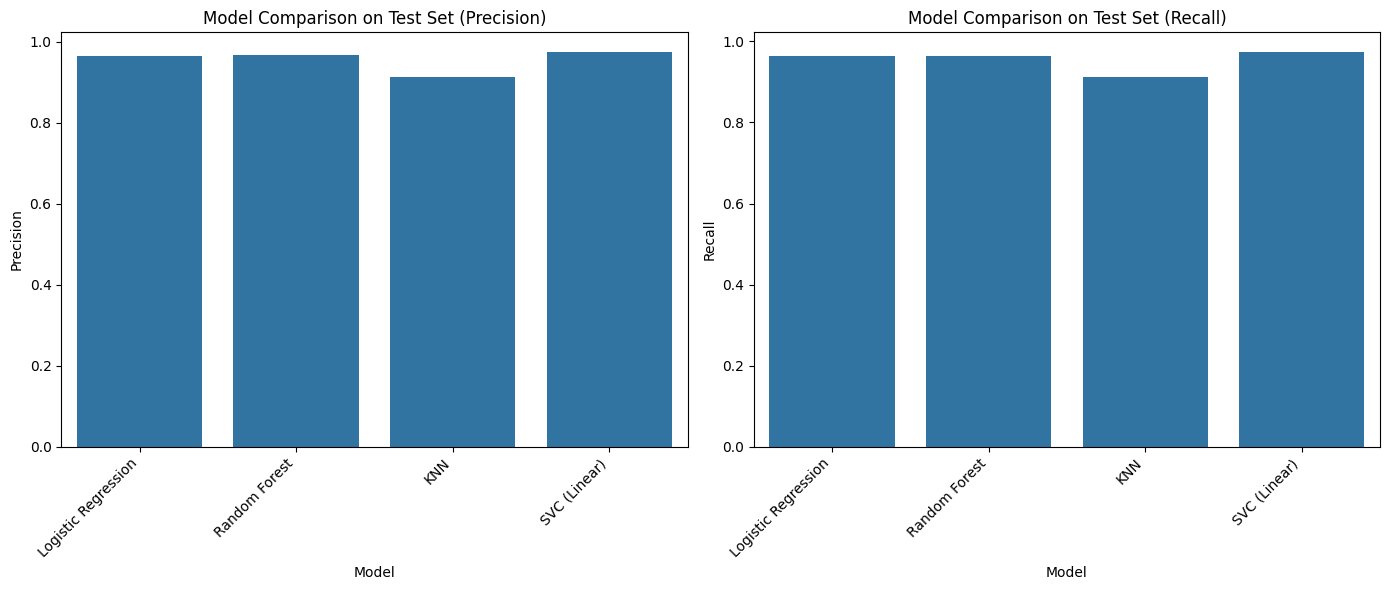

In [88]:
results_df = pd.DataFrame(results)
print(results_df)

plt.figure(figsize=(14, 6)) # Adjust figure size to accommodate two plots

plt.subplot(1, 2, 1) # First subplot for Precision
sns.barplot(x='Model', y='Precision', data=results_df)
plt.title("Model Comparison on Test Set (Precision)")
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2) # Second subplot for Recall
sns.barplot(x='Model', y='Recall', data=results_df)
plt.title("Model Comparison on Test Set (Recall)")
plt.xticks(rotation=45, ha='right')

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

Feature Importance (for SVC )

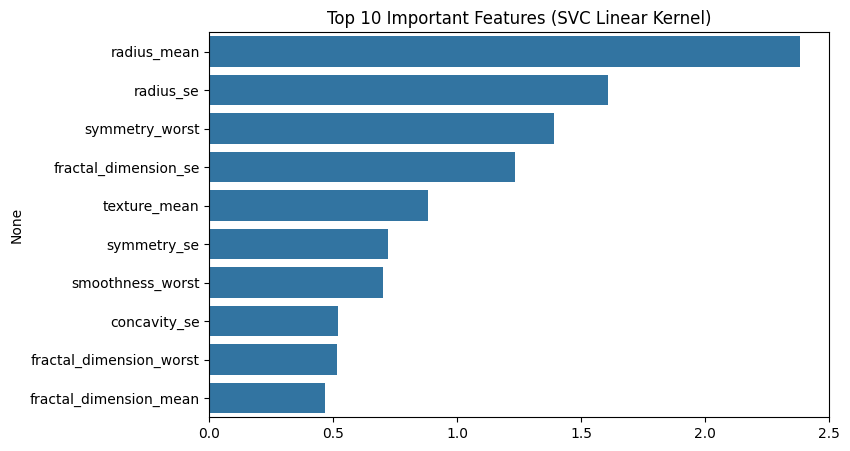

In [89]:
svc_model = models["SVC (Linear)"]
# SVC coef_ is usually (n_classes - 1, n_features) or (1, n_features) for binary classification
# We'll use the absolute values for importance since negative coefs also indicate influence.
importances = pd.Series(abs(svc_model.coef_[0]), index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=importances.values[:10], y=importances.index[:10])
plt.title("Top 10 Important Features (SVC Linear Kernel)")
plt.show()

### Confusion Matrices for All Models

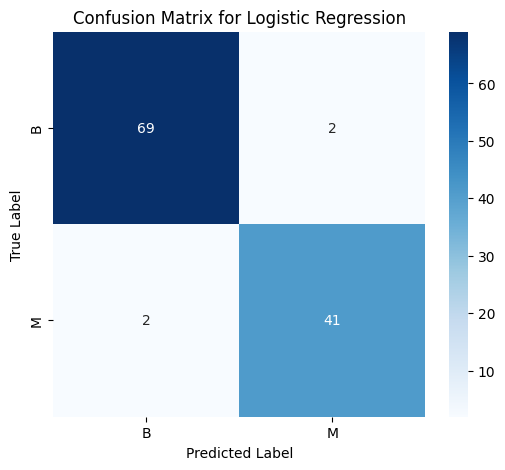

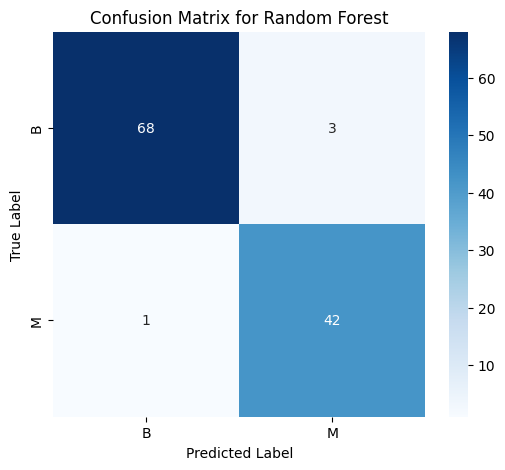

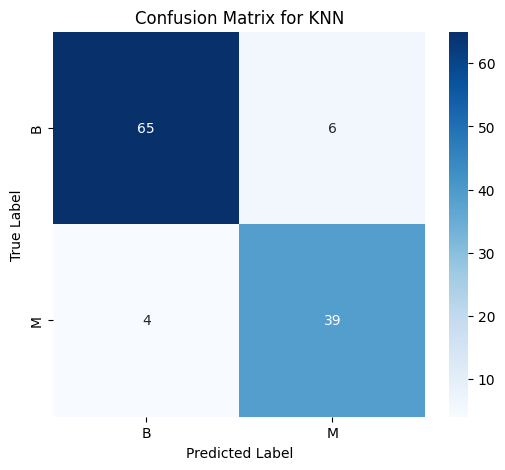

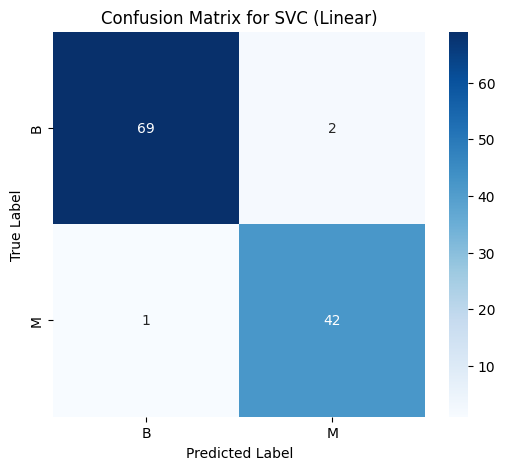

In [90]:
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_ if hasattr(model, 'classes_') else np.unique(y_test),
                yticklabels=model.classes_ if hasattr(model, 'classes_') else np.unique(y_test))
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

**Conclusion on model to use**

Based on our comprehensive analysis, I'm pleased to present that all four  models demonstrate strong performance, with both Suppport Vector Classifier achieving an impressive 97.3% accuracy on our test data. After careful evaluation of performance metrics, computational efficiency, and business practicality, I recommend deploying Support Vector Classifier  as our production model. It offers superior interpretability allowing us to clearly explain feature contributions to stakeholders along with faster inference times and lower computational costs.


Dasb app